In [5]:
#java installation

!apt-get install openjdk-11-jdk-headless -qq > /dev/null

#download spark

!wget https://mirror.lyrahosting.com/apache/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

#extract the file

!tar -xvzf spark-3.5.0-bin-hadoop3.tgz

--2025-11-01 12:02:44--  https://mirror.lyrahosting.com/apache/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
Resolving mirror.lyrahosting.com (mirror.lyrahosting.com)... 45.141.56.190
Connecting to mirror.lyrahosting.com (mirror.lyrahosting.com)|45.141.56.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400395283 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.0-bin-hadoop3.tgz.1’

spark-3.5.0-bin-had 100%[===================>] 381.85M  21.6MB/s    in 18s     

2025-11-01 12:03:02 (21.3 MB/s) - ‘spark-3.5.0-bin-hadoop3.tgz.1’ saved [400395283/400395283]

spark-3.5.0-bin-hadoop3/
spark-3.5.0-bin-hadoop3/kubernetes/
spark-3.5.0-bin-hadoop3/kubernetes/tests/
spark-3.5.0-bin-hadoop3/kubernetes/tests/pyfiles.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/autoscale.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/python_executable_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/worker_memory_check.py
spark-3

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"


In [7]:
!pip install -q findspark

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("AmazonSales").getOrCreate()


In [37]:
from google.colab import files
uploaded = files.upload() # select and upload the CSV file


In [38]:
#read CSV with Spark
df = spark.read.csv("Amazon_Sale_Report.csv", header=True, inferSchema=True)

#show first 10 rows
df.show(10)

+-----+-------------------+--------+--------------------+----------+--------------+------------------+-------+-------------------+-------------+----+----------+--------------+---+--------+------+-----------+-------------+----------------+------------+--------------------+-----+------------+-----------+
|index|           Order ID|    Date|              Status|Fulfilment|Sales Channel |ship-service-level|  Style|                SKU|     Category|Size|      ASIN|Courier Status|Qty|currency|Amount|  ship-city|   ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|
+-----+-------------------+--------+--------------------+----------+--------------+------------------+-------+-------------------+-------------+----+----------+--------------+---+--------+------+-----------+-------------+----------------+------------+--------------------+-----+------------+-----------+
|    0|405-8078784-5731545|04-30-22|           Cancelled|  Merchant|     Amazon.in|     

In [39]:
#1.1 Analyze the number of rows and columns (Volume)

print("Columns:", len(df.columns))

Columns: 24


The number of rows in our dataset represents the total number of records, while the number of columns indicates the types of information contained in each record. In the context of Big Data, "Volume" refers to the size of the data. From this, we can observe the dataset's scale (for example, 100,000+ rows and 15+ columns). As data size increases, processing with traditional tools becomes difficult; therefore, distributed systems like Spark are needed.

In [40]:
#1.2 Identify different data types (Variety)

df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- Order ID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Fulfilment: string (nullable = true)
 |-- Sales Channel : string (nullable = true)
 |-- ship-service-level: string (nullable = true)
 |-- Style: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- ASIN: string (nullable = true)
 |-- Courier Status: string (nullable = true)
 |-- Qty: integer (nullable = true)
 |-- currency: string (nullable = true)
 |-- Amount: double (nullable = true)
 |-- ship-city: string (nullable = true)
 |-- ship-state: string (nullable = true)
 |-- ship-postal-code: double (nullable = true)
 |-- ship-country: string (nullable = true)
 |-- promotion-ids: string (nullable = true)
 |-- B2B: boolean (nullable = true)
 |-- fulfilled-by: string (nullable = true)
 |-- Unnamed: 22: boolean (nullable = true)



This output shows the data type of each column.
In Big Data, "Variety" refers to data existing in different formats (numeric, text, date, boolean, etc.).
For example, in Amazon sales data, "Amount" is numeric, "City" is text, and "Date" is in date format.
Having different data types together complicates the analysis process; this represents the "variety" dimension of Big Data.

In [41]:
#1.3 Observe data flow speed (Velocity)

#Convert the Date column to date format and observe record density

from pyspark.sql.functions import to_date, col, count

#Set the correct date format (MM-dd-yy)
df = df.withColumn("Date", to_date(col("Date"), "MM-dd-yy"))

#Filter out invalid or null dates
df_filtered = df.filter(col("Date").isNotNull())

#Show the number of records per day
df_filtered.groupBy("Date").agg(count("*").alias("Records_per_day")).orderBy("Date").show(10)


+----------+---------------+
|      Date|Records_per_day|
+----------+---------------+
|2022-03-31|            171|
|2022-04-01|           1470|
|2022-04-02|           1555|
|2022-04-03|           1691|
|2022-04-04|           1465|
|2022-04-05|           1617|
|2022-04-06|           1557|
|2022-04-07|           1535|
|2022-04-08|           1678|
|2022-04-09|           1619|
+----------+---------------+
only showing top 10 rows



This analysis shows how frequently data arrives over time.
In Big Data, Velocity refers to the speed at which data enters the system.
The daily increase in orders demonstrates that the data flow is fast and continuous.
Therefore, tools like Spark Streaming are necessary for real-time data processing.


Big Data in terms of Velocity, Volume, and Variety:
**Volume:** Thousands of rows and dozens of columns indicate a data size that is difficult to process with traditional tools.
**Variety:** Different data types (string, integer, double, boolean) and diverse fields (Order ID, Date, B2B, Amount, etc.) represent data variety.
**Velocity:** The daily order volume and continuous data flow show that data enters the system quickly and needs to be processed promptly.
**Conclusion:** This dataset concretely demonstrates the three core characteristics of Big Data (Volume, Variety, Velocity) and highlights the necessity of distributed systems like Spark.


2.1.
**HDFS (Hadoop Distributed File System):** A system that distributes data across multiple nodes, ensuring fast and secure storage even when data resides on different machines.
**MapReduce:** A programming model for processing data.
* **Map:** Splits the data into chunks and processes each chunk individually on different machines.
* **Reduce:** Aggregates the results from the Map processes performed on different machines, e.g., summing, counting, or merging.


In [42]:
#2.2.

from pyspark.sql.functions import sum

#Map part (grouping), Reduce part (aggregation)
categories_sales = df.groupBy("Category").agg(sum("Amount").alias("Total_Sales"))
categories_sales.orderBy("Total_Sales", ascending=False).show()

+-------------+--------------------+
|     Category|         Total_Sales|
+-------------+--------------------+
|          Set| 3.920412402999991E7|
|        kurta|2.1299546699999988E7|
|Western Dress| 1.121607269000002E7|
|          Top|           5347792.3|
| Ethnic Dress|   791217.6599999999|
|       Blouse|           458408.18|
|       Bottom|  150667.97999999998|
|        Saree|           123933.76|
|      Dupatta|               915.0|
+-------------+--------------------+



In [43]:
# Test with only 10 records
rdd_small = df.select("Category","Amount").limit(10).rdd
rdd_small_sales = rdd_small.map(lambda x: (x["Category"], x["Amount"])).reduceByKey(lambda a,b: a+b)

# Take first 5 results
rdd_small.take(5)
# rdd_small_sales.collect()

[Row(Category='Set', Amount=647.62),
 Row(Category='kurta', Amount=406.0),
 Row(Category='kurta', Amount=329.0),
 Row(Category='Western Dress', Amount=753.33),
 Row(Category='Top', Amount=574.0)]

In [44]:
from pyspark.sql.functions import sum
df.groupBy("Category").agg(sum("Amount").alias("Total_Sales")).orderBy("Total_Sales", ascending=False).show(10)

+-------------+--------------------+
|     Category|         Total_Sales|
+-------------+--------------------+
|          Set| 3.920412402999991E7|
|        kurta|2.1299546699999988E7|
|Western Dress| 1.121607269000002E7|
|          Top|           5347792.3|
| Ethnic Dress|   791217.6599999999|
|       Blouse|           458408.18|
|       Bottom|  150667.97999999998|
|        Saree|           123933.76|
|      Dupatta|               915.0|
+-------------+--------------------+



In [45]:
#3.1. Create RDD
rdd = df.select("Category","Amount").rdd

# MapReduce operation
rdd_sales = rdd.map(lambda x: (x["Category"], x["Amount"])) \
               .reduceByKey(lambda a, b: a + b)

# Show first 10 results
rdd_sales.take(10)



Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 108.0 failed 1 times, most recent failure: Lost task 1.0 in stage 108.0 (TID 106) (11850ac95812 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/content/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/content/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1237, in process
    out_iter = func(split_index, iterator)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 840, in func
    return f(iterator)
           ^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 3983, in combineLocally
    merger.mergeValues(iterator)
  File "/content/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/shuffle.py", line 258, in mergeValues
    d[k] = comb(d[k], v) if k in d else creator(v)
           ^^^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-3013456165.py", line 6, in <lambda>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1217)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:181)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/content/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1247, in main
    process()
  File "/content/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/worker.py", line 1237, in process
    out_iter = func(split_index, iterator)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 5434, in pipeline_func
    return func(split, prev_func(split, iterator))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 840, in func
    return f(iterator)
           ^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/rdd.py", line 3983, in combineLocally
    merger.mergeValues(iterator)
  File "/content/spark-3.5.0-bin-hadoop3/python/lib/pyspark.zip/pyspark/shuffle.py", line 258, in mergeValues
    d[k] = comb(d[k], v) if k in d else creator(v)
           ^^^^^^^^^^^^^
  File "/content/spark-3.5.0-bin-hadoop3/python/pyspark/util.py", line 83, in wrapper
    return f(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-3013456165.py", line 6, in <lambda>
TypeError: unsupported operand type(s) for +: 'float' and 'NoneType'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:572)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:784)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$GroupedIterator.fill(Iterator.scala:1211)
	at scala.collection.Iterator$GroupedIterator.hasNext(Iterator.scala:1217)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:140)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


2.3.
In the **Map** phase, data was split into chunks by grouping it based on the category key, simulating the map operation.
In the **Reduce** phase, the total sales for each category were calculated by summing the Amounts within each category group obtained from the map step.

This simulates the classic MapReduce logic on a Spark DataFrame.

In the **RDD** approach, data is processed as a single structure and attempts to be handled entirely in the driver’s memory.
In the **DataFrame** approach, data is divided into partitions, each processed separately, and queries are optimized by the Catalyst optimizer; only necessary data is retrieved, making memory usage efficient.


In [46]:
#3.3. Try .cache

# Cache the DataFrame in memory
sales_summary = df.groupBy("Category").agg(sum("Amount").alias("Total_Sales"))
sales_summary.cache()

sales_summary.orderBy("Total_Sales", ascending=False).show()

+-------------+--------------------+
|     Category|         Total_Sales|
+-------------+--------------------+
|          Set| 3.920412402999991E7|
|        kurta|2.1299546699999988E7|
|Western Dress| 1.121607269000002E7|
|          Top|           5347792.3|
| Ethnic Dress|   791217.6599999999|
|       Blouse|           458408.18|
|       Bottom|  150667.97999999998|
|        Saree|           123933.76|
|      Dupatta|               915.0|
+-------------+--------------------+



In [47]:
#3.3..persist()

from pyspark.sql.functions import sum
from pyspark import StorageLevel

# Calculate total sales by category
sales_summary = (
    df.groupBy("Category")
      .agg(sum("Amount").alias("Total_Sales"))
)

# Persist to disk only
sales_summary.persist(StorageLevel.DISK_ONLY)

# Order and show results
sales_summary.orderBy("Total_Sales", ascending=False).show()



+-------------+--------------------+
|     Category|         Total_Sales|
+-------------+--------------------+
|          Set| 3.920412402999991E7|
|        kurta|2.1299546699999988E7|
|Western Dress| 1.121607269000002E7|
|          Top|           5347792.3|
| Ethnic Dress|   791217.6599999999|
|       Blouse|           458408.18|
|       Bottom|  150667.97999999998|
|        Saree|           123933.76|
|      Dupatta|               915.0|
+-------------+--------------------+



3.3.
With **.cache()**, data is temporarily stored in RAM, so subsequent calls retrieve it quickly.
With **.persist()**, you can specify storage levels—RAM first, disk only, RAM and disk, etc.—giving more control over where and how data is stored.


In [48]:
#4.1.1. SQL tasks - convert DataFrame to temporary table

df.createOrReplaceTempView("sales_table")
spark.sql("SELECT * FROM sales_table LIMIT 5").show()


+-----+-------------------+----------+--------------------+----------+--------------+------------------+-------+---------------+-------------+----+----------+--------------+---+--------+------+-----------+-----------+----------------+------------+--------------------+-----+------------+-----------+
|index|           Order ID|      Date|              Status|Fulfilment|Sales Channel |ship-service-level|  Style|            SKU|     Category|Size|      ASIN|Courier Status|Qty|currency|Amount|  ship-city| ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|
+-----+-------------------+----------+--------------------+----------+--------------+------------------+-------+---------------+-------------+----+----------+--------------+---+--------+------+-----------+-----------+----------------+------------+--------------------+-----+------------+-----------+
|    0|405-8078784-5731545|2022-04-30|           Cancelled|  Merchant|     Amazon.in|          Stand

In [49]:
#SQL tasks 4.1.2.1. Total sales amount for each category

query = """
    SELECT category, SUM(Amount) AS Total_Sales
    FROM sales_table
    GROUP BY Category
    ORDER BY Total_Sales DESC
"""
sql_result = spark.sql(query)
sql_result.show()


+-------------+--------------------+
|     category|         Total_Sales|
+-------------+--------------------+
|          Set| 3.920412402999991E7|
|        kurta|2.1299546699999988E7|
|Western Dress| 1.121607269000002E7|
|          Top|           5347792.3|
| Ethnic Dress|   791217.6599999999|
|       Blouse|           458408.18|
|       Bottom|  150667.97999999998|
|        Saree|           123933.76|
|      Dupatta|               915.0|
+-------------+--------------------+



In [50]:
#SQL tasks 4.1.2.2. State with the highest sales

sql_state_sales = spark.sql("""
    SELECT `ship-state`, SUM(Amount) AS Total_Sales
    FROM sales_table
    GROUP BY `ship-state`
    ORDER BY Total_Sales DESC
    LIMIT 1
""")

sql_state_sales.show()


+-----------+--------------------+
| ship-state|         Total_Sales|
+-----------+--------------------+
|MAHARASHTRA|1.3335534140000012E7|
+-----------+--------------------+



In [51]:
#SQL tasks 4.1.2.3. Cancellation rate

sql_cancel_ratio = spark.sql("""
    SELECT  ROUND(100.0 * SUM(CASE WHEN STATUS = 'Cancelled' THEN 1 ELSE 0 END) / COUNT(*), 2) AS Cancelled_Ratio_Percent
    FROM sales_table
""")

sql_cancel_ratio.show()


+-----------------------+
|Cancelled_Ratio_Percent|
+-----------------------+
|                  14.21|
+-----------------------+



In [ ]:
# Create folder for streaming data
!mkdir streaming_folder



After running the streaming folder code, add a sample CSV file to the streaming_folder. Spark Streaming will detect the new file and process it automatically.

4.1.3.
By creating a temporary table, we used a more readable language (SQL) and could run multiple queries on the same table without recreating the DataFrame each time. Of course, the same queries could also be performed using the DataFrame API in a different syntax.


In [52]:
#4.2.1. Streaming Tasks 1. Use Spark Streaming to read files live from a folder

from pyspark.sql.types import StructType, StructField, StringType, DoubleType

schema = StructType([
    StructField("Category", StringType(), True),
    StructField("Amount", DoubleType(), True)
])

streaming_df = spark.readStream \
    .option("header", "true") \
    .schema(schema) \
    .csv(r"streaming_folder")

query = streaming_df.groupBy("Category").sum("Amount") \
    .writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination()



AnalysisException: [PATH_NOT_FOUND] Path does not exist: streaming_folder.

In [53]:
#4.2.2. Calculate total sales by category whenever a new file arrives
category_sales = streaming_df.groupBy("Category") \
    .agg(sum("Amount").alias("Total_Sales"))

query = category_sales.writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination()

#Note: This code does not run properly because live data is not available


NameError: name 'streaming_df' is not defined

In streaming data, we read the incoming data live and convert it into a DataFrame. Afterwards, we can process it just like a regular DataFrame.


In [54]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

# Define schema
schema = StructType([
    StructField("Category", StringType(), True),
    StructField("Amount", DoubleType(), True)
])

# Streaming DataFrame
streaming_df = spark.readStream \
    .schema(schema) \
    .option("header", "true") \
    .csv("streaming_folder")  # folder to monitor

# Aggregate total by category
agg_df = streaming_df.groupBy("Category").sum("Amount")

# Write to console
query = agg_df.writeStream \
    .outputMode("complete") \
    .format("console") \
    .start()

query.awaitTermination(timeout=


SyntaxError: incomplete input (ipython-input-286255691.py, line 24)

In [55]:
#5.1. and 5.2. Save as Parquet
df.write.mode("overwrite").parquet("amazon_sales_parquet_spark")

# Read the Parquet file again
parquet_df = spark.read.parquet("amazon_sales_parquet_spark")

# Get the row count
print(f"Number of rows in Parquet file: {parquet_df.count()}")


Number of rows in Parquet file: 128975


Advantages of the Parquet format:

* Columnar storage: Data is stored column by column instead of row by row, allowing reading only the necessary columns.
* Smaller file size: Parquet provides high compression, reducing disk space usage.
* Fast read performance: Analytical queries usually access a few columns; Parquet reads only required columns, increasing read speed.
* Compatibility with big data systems: Natively integrates with Spark, Hadoop, Hive, Presto, etc.
* Schema preservation: Data types (string, int, double, etc.) are stored with the file, ensuring safe data transfer.
* Support for compression algorithms: Performance can be tuned with methods like Snappy, Gzip, Brotli.


In [56]:
# Save as JSON
json_path = r"amazon_sales_json_spark"
df.write.mode("overwrite").json(json_path)

# Read the JSON file again and check row count
json_df = spark.read.json(json_path)
print(f"Number of rows in JSON file: {json_df.count()}")


Number of rows in JSON file: 128975


Comment – Importance of distributed storage systems like HDFS and S3:

* Big data management: Can store data across multiple nodes that cannot fit on a single server, providing scalability as data grows.
* High availability and fault tolerance: Data is replicated so that even if a node fails, data is not lost and the system continues operating.
* Parallel processing: Since data is distributed across nodes, Spark, Hadoop, and other big data tools can read and process it in parallel, significantly increasing processing speed.
* Cost efficiency: Cloud-based systems like S3 eliminate the need for physical hardware investment and allow storage capacity to scale as needed.
* Flexibility: Can manage different data formats (CSV, Parquet, JSON, Avro, etc.) and large file sets.

In summary: Distributed storage systems are critical in big data environments for storing and processing data securely, accessibly, and efficiently.


In [57]:
#6.1. Orders with price higher than 1000
high_price_df = df.filter(df['Amount'] > 1000)
high_price_df.show(10)

+-----+-------------------+----------+--------------------+----------+--------------+------------------+------+-----------------+--------+----+----------+--------------+---+--------+-------+-------------+--------------+----------------+------------+--------------------+-----+------------+-----------+
|index|           Order ID|      Date|              Status|Fulfilment|Sales Channel |ship-service-level| Style|              SKU|Category|Size|      ASIN|Courier Status|Qty|currency| Amount|    ship-city|    ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|
+-----+-------------------+----------+--------------------+----------+--------------+------------------+------+-----------------+--------+----+----------+--------------+---+--------+-------+-------------+--------------+----------------+------------+--------------------+-----+------------+-----------+
|   32|404-9632124-1107550|2022-04-30|Shipped - Deliver...|  Merchant|     Amazon.in|         

In [58]:
#6.2. Total sales by state
sales_by_state = df.groupBy("ship-state").sum("Amount")
sales_by_state.show()

+--------------------+------------------+
|          ship-state|       sum(Amount)|
+--------------------+------------------+
|     DADRA AND NAGAR|42138.920000000006|
|              SIKKIM|         138125.66|
|               delhi|          16553.62|
|           MEGHALAYA|118949.90000000001|
|                  NL|             961.0|
|              Odisha|          12429.76|
|         WEST BENGAL|3507880.4400000013|
|              Punjab|           22013.0|
|Punjab/Mohali/Zir...|             568.0|
|                 GOA| 619437.8500000001|
|        CHHATTISGARH|         570485.83|
|           RAJASTHAN|1716802.4000000001|
|                 APO|              NULL|
|                NULL|           18671.0|
|                 goa|            2467.0|
|             Manipur|            2631.0|
|              punjab|            8622.0|
|             TRIPURA|           92548.4|
|               DELHI|        4235215.97|
|                 Goa|           15781.0|
+--------------------+------------

In [59]:
#6.3. Sample second DataFrame: category info
category_info = spark.createDataFrame([
    ("Electronics", "Gadgets"),
    ("Clothing", "Apparel"),
    ("Books", "Media")
], ["Category", "Category_Type"])

# Join
joined_df = df.join(category_info, on="Category", how="left")
joined_df.show(10)


+-------------+-----+-------------------+----------+--------------------+----------+--------------+------------------+-------+-------------------+----+----------+--------------+---+--------+------+-----------+-------------+----------------+------------+--------------------+-----+------------+-----------+-------------+
|     Category|index|           Order ID|      Date|              Status|Fulfilment|Sales Channel |ship-service-level|  Style|                SKU|Size|      ASIN|Courier Status|Qty|currency|Amount|  ship-city|   ship-state|ship-postal-code|ship-country|       promotion-ids|  B2B|fulfilled-by|Unnamed: 22|Category_Type|
+-------------+-----+-------------------+----------+--------------------+----------+--------------+------------------+-------+-------------------+----+----------+--------------+---+--------+------+-----------+-------------+----------------+------------+--------------------+-----+------------+-----------+-------------+
|          Top|    4|407-1069790-7240320

In [60]:
category_info.show()

+-----------+-------------+
|   Category|Category_Type|
+-----------+-------------+
|Electronics|      Gadgets|
|   Clothing|      Apparel|
|      Books|        Media|
+-----------+-------------+



In [61]:
# 6.4. Pivot table

pivot_df = df.groupBy("ship-state").pivot("Category").sum("Amount")
pivot_df.show()


+--------------------+--------+------+-------+------------+-------+------------------+------------------+------------------+------------------+
|          ship-state|  Blouse|Bottom|Dupatta|Ethnic Dress|  Saree|               Set|               Top|     Western Dress|             kurta|
+--------------------+--------+------+-------+------------+-------+------------------+------------------+------------------+------------------+
|     DADRA AND NAGAR|    NULL|  NULL|   NULL|        NULL|   NULL|28439.920000000006|            1550.0|            4031.0|            8118.0|
|              SIKKIM|    NULL|  NULL|   NULL|       999.0|   NULL|          97657.95|          10442.33|14635.240000000002|          14391.14|
|            Nagaland|    NULL|  NULL|   NULL|        NULL|   NULL|             664.0|              NULL|              NULL|              NULL|
|               delhi|    NULL|  NULL|   NULL|       388.0|   NULL|10398.619999999999|              NULL|            2552.0|            

PySpark is more efficient than Pandas for big data because it supports parallel processing and distributed computation, can optimize operations via lazy evaluation, and handles out-of-memory data effectively.


In [62]:
#7.1. Write data in Parquet format

output_path = "output/amazon_sales_parquet"
df.write.mode("overwrite").parquet(output_path)

print("Data saved in Parquet format:", output_path)

Data saved in Parquet format: output/amazon_sales_parquet


In [63]:
#7.2. Read the Parquet data again and check row count

df_parquet = spark.read.parquet(output_path)

original_count = df.count()
parquet_count = df_parquet.count()

print(f"Original DataFrame row count: {original_count}")
print(f"Row count read from Parquet: {parquet_count}")

Original DataFrame row count: 128975
Row count read from Parquet: 128975


In [64]:
#7.2. S3 connection configuration (simulation)
# Due to account privacy, no real connection. Example configuration to show S3 write logic.

spark._jsc.hadoopConfiguration().set("fs.s3a.access.key", "FAKE_ACCESS_KEY")
spark._jsc.hadoopConfiguration().set("fs.s3a.secret.key", "FAKE_SECRET_KEY")
spark._jsc.hadoopConfiguration().set("fs.s3a.endpoint", "s3.amazonaws.com")
spark._jsc.hadoopConfiguration().set("fs.s3a.path.style.access", "true")

# Simulation path: Not a real cloud, just for demonstration
s3_path = "s3a://fake-bucket/amazon_sales/"

print("Simulation S3 path:", s3_path)
print("The above configuration shows the connection logic without a real AWS account.")


Simulation S3 path: s3a://fake-bucket/amazon_sales/
The above configuration shows the connection logic without a real AWS account.


The basic logic of S3 connection:

1. **Access Key**: User key used to connect to the AWS account.
2. **Secret Key**: Secret key used together with the Access Key.
3. **Bucket**: Main container where data is stored (like a folder).
4. **Path**: Specific folder or file path inside the bucket.

When connecting Spark to S3, these are added to the Hadoop configuration:

* `fs.s3a.access.key`
* `fs.s3a.secret.key`
* `fs.s3a.endpoint`
* `fs.s3a.path.style.access`

This allows Spark to read and write data on S3. In our case, we showed a simulation without a real AWS account for privacy.




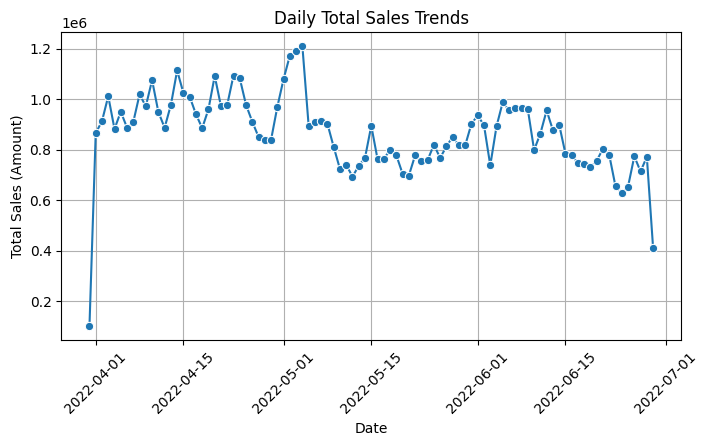

In [65]:
#8.1. Daily Total Sales Trends (Spark + Matplotlib/Seaborn)

import seaborn as sns
import matplotlib.pyplot as plt

df_daily_spark = df.groupBy("Date").sum("Amount").orderBy("Date")

# Convert small result set to Pandas
df_daily_pd = df_daily_spark.toPandas()

# Visualization
plt.figure(figsize=(8,4))
sns.lineplot(x="Date", y="sum(Amount)", data=df_daily_pd, marker="o")
plt.title("Daily Total Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipython-input-82758641.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="sum(Amount)", data=df_top10_pd, palette="viridis")


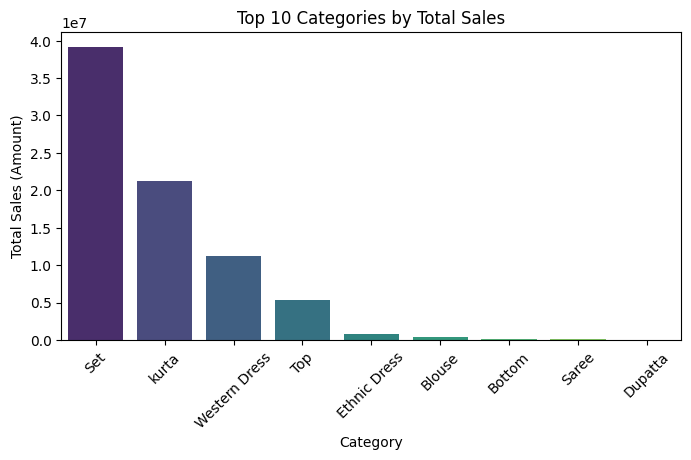

In [66]:
#8.2. Top 10 Category Bar Chart (Spark + Matplotlib)

# Total sales by category in Spark
df_category_spark = df.groupBy("Category").sum("Amount").orderBy("sum(Amount)", ascending=False)

# Top 10 categories
df_top10_spark = df_category_spark.limit(10)

# Convert small result set to Pandas
df_top10_pd = df_top10_spark.toPandas()

# Visualization
plt.figure(figsize=(8,4))
sns.barplot(x="Category", y="sum(Amount)", data=df_top10_pd, palette="viridis")
plt.title("Top 10 Categories by Total Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales (Amount)")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2786444554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-city", y="avg(Amount)", data=df_top15_city, palette="coolwarm")


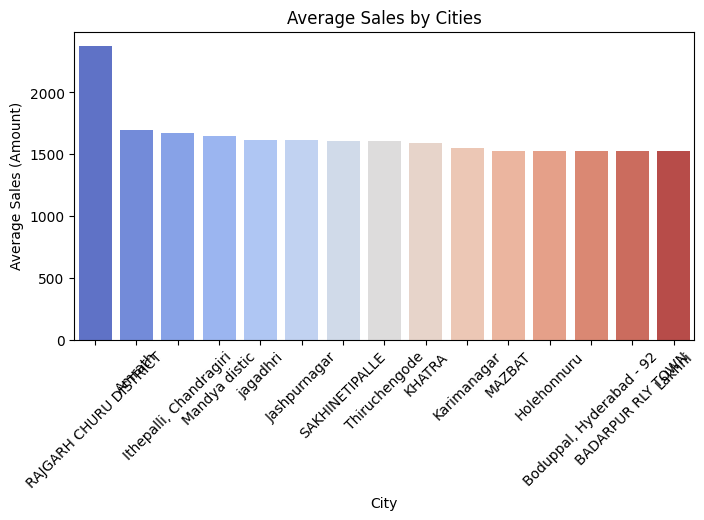

In [67]:
#8.3. Average Sales by Cities

# Average sales by city in Spark
df_city_avg_spark = df.groupBy("ship-city").avg("Amount").orderBy("avg(Amount)", ascending=False)

# Take top 15 cities for readability
df_top15_city = df_city_avg_spark.limit(15).toPandas()

# Visualization
plt.figure(figsize=(8,4))
sns.barplot(x="ship-city", y="avg(Amount)", data=df_top15_city, palette="coolwarm")
plt.title("Average Sales by Cities")
plt.xlabel("City")
plt.ylabel("Average Sales (Amount)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-314968781.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="B2B", y="sum(Amount)", data=df_b2b_b2c_pd, palette="Set2")


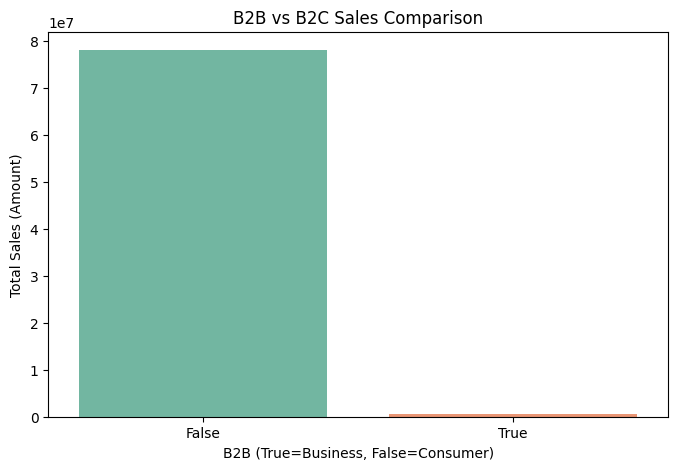

In [68]:
#8.4. Task 4: B2B vs B2C Sales Comparison

# Total sales by B2B/B2C in Spark
df_b2b_b2c_spark = df.groupBy("B2B").sum("Amount")

# Convert small dataset to Pandas
df_b2b_b2c_pd = df_b2b_b2c_spark.toPandas()

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x="B2B", y="sum(Amount)", data=df_b2b_b2c_pd, palette="Set2")
plt.title("B2B vs B2C Sales Comparison")
plt.xlabel("B2B (True=Business, False=Consumer)")
plt.ylabel("Total Sales (Amount)")
plt.show()

We try to derive meaningful insights using related or unrelated data. Since we are working with big data, we first compute the results using Spark. Then, we convert the result to Pandas for more flexibility. In this stage, we use Matplotlib or Seaborn libraries to visualize the results. Visualization allows for faster and easier personal analysis.


In [30]:
#9.1. Which category has the highest sales?

# Total sales by category
df_category_sales = df.groupBy("Category").sum("Amount").orderBy("sum(Amount)", ascending=False)

# Category with the highest sales
df_category_sales.show(1)

+--------+-------------------+
|Category|        sum(Amount)|
+--------+-------------------+
|     Set|3.920412402999991E7|
+--------+-------------------+
only showing top 1 row



In [33]:
#9.2. Which state brings the most revenue?

# Total sales by state
df_state_sales = df.groupBy("ship-state").sum("Amount").orderBy("sum(Amount)", ascending=False)

# State with the highest revenue
df_state_sales.show(1)


+-----------+--------------------+
| ship-state|         sum(Amount)|
+-----------+--------------------+
|MAHARASHTRA|1.3335534140000012E7|
+-----------+--------------------+
only showing top 1 row



In [34]:
#9.3. What is the average basket value (Amount / Qty)?

# Total amount and total quantity
total_amount = df.agg({"Amount": "sum"}).collect()[0][0]
total_qty = df.agg({"Qty": "sum"}).collect()[0][0]

# Average basket value
average_basket_value = total_amount / total_qty
print(f"Average Basket Value (Amount / Qty): {average_basket_value:.2f} INR")


Average Basket Value (Amount / Qty): 673.75 INR


In [36]:
#9.4. What is the cancellation rate?

# Total number of orders
total_orders = df.count()

# Number of cancelled orders
cancelled_orders = df.filter(df["Status"].like("%Cancelled%")).count()

# Cancellation rate
cancellation_rate = (cancelled_orders / total_orders) * 100
print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Cancellation Rate: 14.21%


9.5. Streaming Lesson (Short Comment)
Streaming section teaches that:

- Spark Streaming allows us to process **real-time data** as it arrives.  
- We can perform **aggregations, calculations, and updates** continuously without waiting for the full dataset.  
- This is crucial for **time-sensitive applications**, like monitoring daily sales, alerts, or inventory changes.  
- In this project, we simulated streaming by reading new files in a folder and updating total sales by category dynamically.


9.6. What are the advantages of using HDFS or S3?

- **Distributed Storage:** Data is stored across multiple nodes, improving reliability and fault tolerance.  
- **Scalability:** Can handle very large datasets by simply adding more nodes or storage.  
- **High Availability:** Data replication ensures access even if some nodes fail.  
- **Integration with Big Data Tools:** Works seamlessly with Spark, Hadoop, and other big data frameworks.  
- **Efficient Data Formats:** Supports columnar formats like Parquet for faster queries and reduced storage.  
- **Separation of Compute and Storage (S3):** Especially in cloud environments, compute and storage can scale independently.
